# 서포트 벡터 머신(SVM)

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 30)

In [4]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

- 표준정규분포로 정규화

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)
df = pd.DataFrame(cancer_std, columns=cancer.feature_names)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)

- 모델 생성, 학습 및 평가

In [7]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9824561403508771

- 하이퍼 파라미터 조정

In [8]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
params = {'C':[0.01, 0.1, 1., 5., 10., 100.]}

In [10]:
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid={'C': [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]},
             scoring='accuracy')

In [11]:
grid_svc.best_params_

{'C': 5.0}

In [12]:
params = {'C':[2., 3., 4., 5., 6., 7., 8., 9.]}
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid={'C': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]},
             scoring='accuracy')

In [13]:
grid_svc.best_params_

{'C': 3.0}

- 최적 파라메터로 학습한 모델로 평가

In [14]:
grid_svc.best_estimator_.score(X_test, y_test)

0.9824561403508771

- Toy MNIST 손글씨(load_digits)

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
X = digits.data
y = digits.target

In [17]:
X.shape, y.shape

((1797, 64), (1797,))

In [18]:
X[:2], y[:2]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
         15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
         12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
          0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
         10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
          9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
         15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
          0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
         16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
 array([0, 1]))

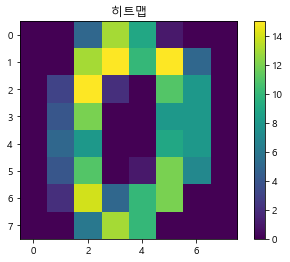

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.imshow(digits.data[0].reshape(8,8))
plt.colorbar()
plt.title('히트맵')
plt.show()

In [20]:
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [21]:
df2 = pd.DataFrame(digits.data, columns=digits.feature_names)
df2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
df2.shape

(1797, 64)

In [23]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
digits_std = scaler.fit_transform(digits.data)
df2 = pd.DataFrame(digits_std, columns=digits.feature_names)
df2.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.000000,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-6.326480e-17,7.908099e-17,3.163240e-17,-5.535670e-17,-5.535670e-17,0.000000,1.581620e-17,-2.767835e-17,2.372430e-17,...,-7.908099e-18,2.372430e-17,-1.186215e-17,-3.954050e-17,-6.326480e-17,-1.818863e-16,4.349455e-17,4.942562e-17,9.885124e-17,1.581620e-17
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-0.409724,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits_std, digits.target, stratify=digits.target, test_size=0.2, random_state=2021
)

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9805555555555555

In [27]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
params = {'C':[0.01, 0.1, 1., 5., 10., 100.]}
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid={'C': [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]},
             scoring='accuracy')

In [29]:
grid_svc.best_params_

{'C': 1.0}

In [30]:
params = {'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [31]:
grid_svc.best_params_

{'C': 3}

In [32]:
grid_svc.best_estimator_.score(X_test, y_test)

0.975

- 강사님 방법

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

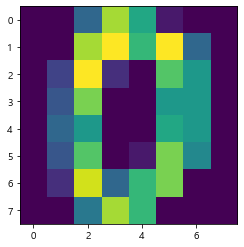

In [34]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])
plt.show()

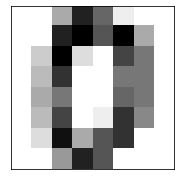

In [35]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

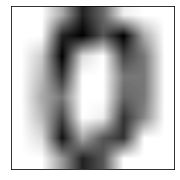

In [36]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data/16, digits.target, stratify=digits.target, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [38]:
y_test[0]

1

In [39]:
import pandas as pd
df3 = pd.DataFrame(digits.data/16)
df3['target'] = digits.target
df3.head(11)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0000,0.0,0.500,...,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4
5,0.0,0.0,0.7500,0.6250,0.0000,0.0000,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.5625,1.0000,1.0000,0.6250,0.0000,0.0,5
6,0.0,0.0,0.0000,0.7500,0.8125,0.0000,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.0625,0.5625,0.9375,0.6875,0.1875,0.0,6
7,0.0,0.0,0.4375,0.5000,0.8125,1.0000,0.9375,0.0625,0.0,0.000,...,0.0,0.0,0.0,0.8125,0.3125,0.0000,0.0000,0.0000,0.0,7
8,0.0,0.0,0.5625,0.8750,0.5000,0.0625,0.0000,0.0000,0.0,0.000,...,0.0,0.0,0.0,0.6875,1.0000,0.9375,0.6875,0.0625,0.0,8
9,0.0,0.0,0.6875,0.7500,0.0000,0.0000,0.0000,0.0000,0.0,0.125,...,0.0,0.0,0.0,0.5625,0.7500,0.8125,0.1875,0.0000,0.0,9


In [40]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [41]:
y_test.iloc[0]

1

In [42]:
y_test.index[0]

267

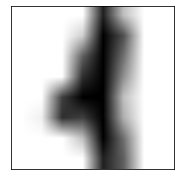

In [43]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[267], cmap=plt.cm.binary, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.show()

- 모델 생성, 하이퍼 파라미터 튜닝

In [44]:
svc = SVC(random_state=2021)
params= {'C': [0.1, 1, 5, 10]}
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=3)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 5}

In [45]:
params= {'C': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=3)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 3}

In [46]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.9805555555555555

- 실제 테스트: 테스트 데이터셋의 iloc 값이 10, 20, 30 번째 데이터

In [47]:
y_test.iloc[10:40:10]

48      0
1724    2
686     8
Name: target, dtype: int32

In [48]:
best_svc.predict(X_test.iloc[10:40:10, :])

array([0, 2, 8])

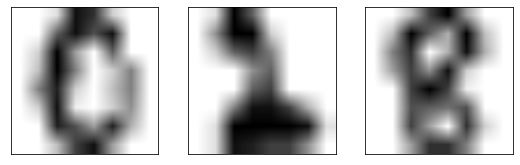

In [49]:
plt.figure(figsize=(9, 3))
for i, index in enumerate(y_test.index[10:40:10]):
    plt.subplot(1,3,i+1)
    plt.imshow(digits.images[index], cmap=plt.cm.binary, interpolation='bilinear')
    plt.xticks([]), plt.yticks([])
plt.show()